In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## create this two folders
IN_DIR = "data_from_sol_22_updated"
OUT_DIR = "jan_24_fractal_applied_from_sol_22"

In [2]:
## this contains the data for all the years and month to form a continuous flow of data combining multiple data sources like from different satellites
## the data is chosen based on number_of_missing values in a given data source.
df_data = pd.read_csv("continuous_data_new_all.csv")
df_data

,file_names,satellite,year,month,total_rows,missing_values
0,1986/g05_xrs_1m_19860101_19860131.csv,goes05,1986,1,44640,617
1,1986/g05_xrs_1m_19860201_19860228.csv,goes05,1986,2,40320,203
2,1986/g05_xrs_1m_19860301_19860331.csv,goes05,1986,3,44640,2686
3,1986/g05_xrs_1m_19860401_19860430.csv,goes05,1986,4,43200,3646
4,1986/g05_xrs_1m_19860501_19860531.csv,goes05,1986,5,44640,517
...,...,...,...,...,...,...
451,2023/2023-08.csv,goes16,2023,8,44640,0
452,2023/2023-09.csv,goes16,2023,9,43200,0
453,2023/2023-10.csv,goes16,2023,10,44640,0
454,2023/2023-11.csv,goes16,2023,11,43200,0


## usages of satellite data over time

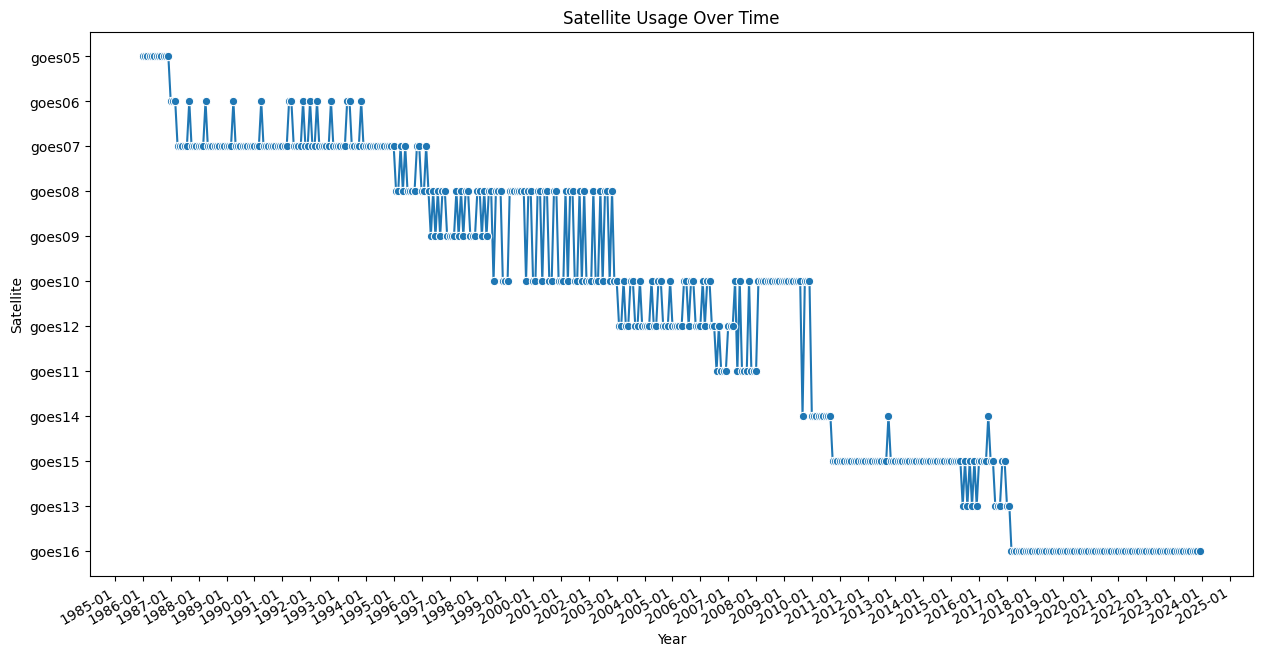

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

satellite_data = df_data
satellite_data['date'] = pd.to_datetime(satellite_data[['year', 'month']].assign(DAY=1))

# Creating a simpler plot showing only the year, month, and satellite usage
plt.figure(figsize=(15, 8))

# Using seaborn's lineplot for better handling of categorical data on x-axis
sns.lineplot(data=satellite_data, x='date', y='satellite', marker='o')

plt.title('Satellite Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Satellite')
plt.grid(False)

# Formatting the date axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate() # Rotate date labels

plt.show()


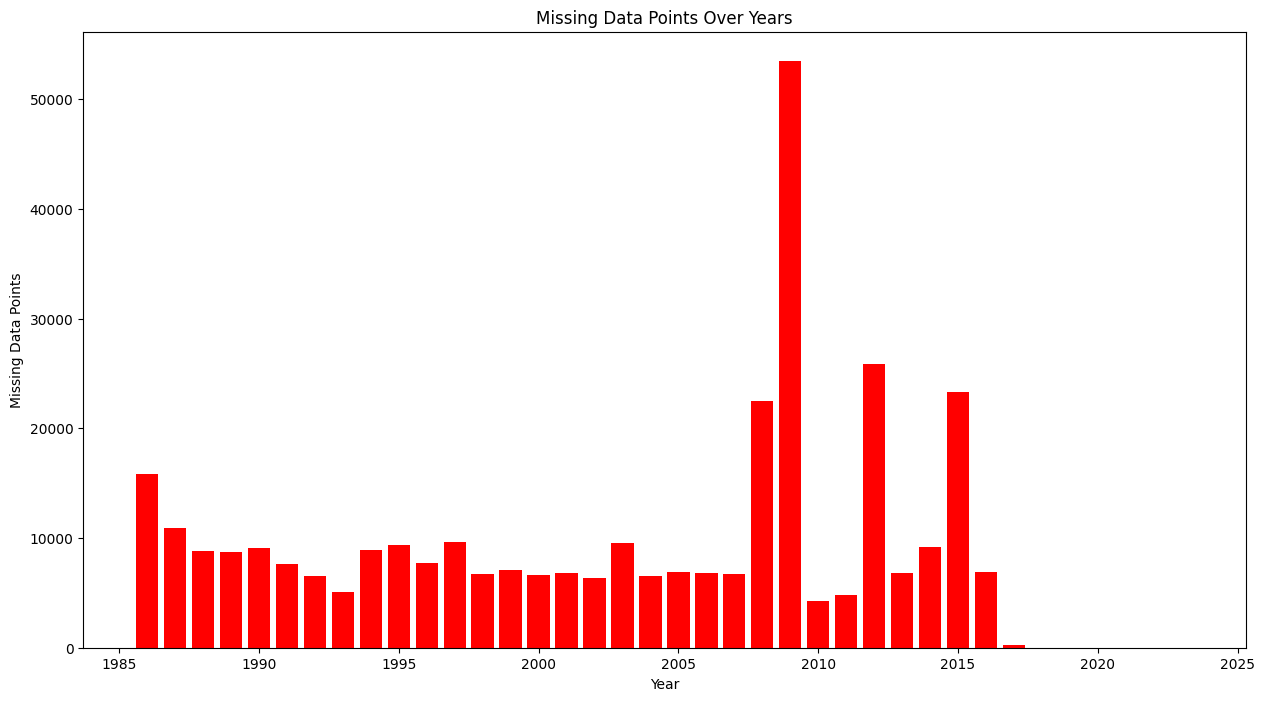

In [59]:
# Correcting the grouping for the bar plot
grouped_data_yearly_corrected = satellite_data.groupby('year')['missing_values'].sum()

# Creating a bar plot of missing values over years
plt.figure(figsize=(15, 8))
plt.bar(grouped_data_yearly_corrected.index, grouped_data_yearly_corrected, color='red')

plt.title('Missing Data Points Over Years')
plt.xlabel('Year')
plt.ylabel('Missing Data Points')
plt.grid(False)
plt.show()

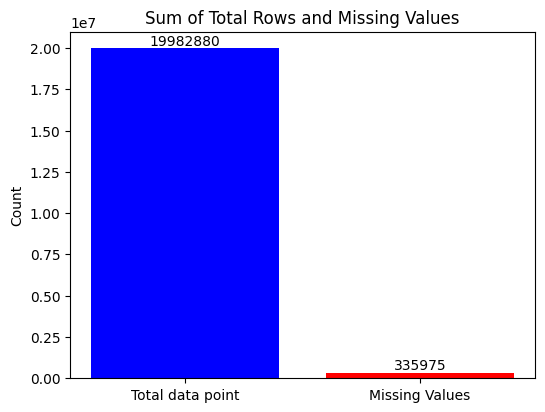

(19982880, 335975)

In [8]:
# Calculating the sums
total_rows_sum = df_data['total_rows'].sum()
missing_values_sum = df_data['missing_values'].sum()

# Plotting
plt.figure(figsize=(6, 4.5))
bars = plt.bar(['Total data point', 'Missing Values'], [total_rows_sum, missing_values_sum], color=['blue', 'red'])

# Adding the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

#plt.bar(['Total Rows', 'Missing Values'], [total_rows_sum, missing_values_sum], color=['blue', 'red'])
plt.title('Sum of Total Rows and Missing Values')
plt.ylabel('Count')
plt.show()

(total_rows_sum, missing_values_sum)

## Merge all data to get min, max and mean filling RMSE

In [10]:
## merge all dataframe to get a continuous data file
dataframes = []
for i, row in df_data.iterrows():
    df = pd.read_csv(os.path.join(IN_DIR, row["file_names"]))
    dataframes.append(df)

# Concatenate the list of DataFrames into one DataFrame
df_main = pd.concat(dataframes, ignore_index=True)
df_main

,time_tag,xs,xl,Time_tag
0,1986-01-01 00:00:00.000,6.190000e-11,1.030000e-09,NaN
1,1986-01-01 00:01:00.000,6.190000e-11,1.030000e-09,NaN
2,1986-01-01 00:02:00.000,6.190000e-11,1.030000e-09,NaN
3,1986-01-01 00:03:00.000,6.190000e-11,1.030000e-09,NaN
4,1986-01-01 00:04:00.000,6.190000e-11,1.030000e-09,NaN
...,...,...,...,...
19982875,NaN,3.666610e-07,6.414194e-06,2023-12-31 23:55:00
19982876,NaN,3.539363e-07,6.254857e-06,2023-12-31 23:56:00
19982877,NaN,3.453191e-07,6.114120e-06,2023-12-31 23:57:00
19982878,NaN,3.319112e-07,5.965794e-06,2023-12-31 23:58:00


In [11]:
df_main['time_tag'] = df_main['time_tag'].fillna(df_main['Time_tag'])
df_main.drop('Time_tag', axis=1, inplace=True)
df_main

,time_tag,xs,xl
0,1986-01-01 00:00:00.000,6.190000e-11,1.030000e-09
1,1986-01-01 00:01:00.000,6.190000e-11,1.030000e-09
2,1986-01-01 00:02:00.000,6.190000e-11,1.030000e-09
3,1986-01-01 00:03:00.000,6.190000e-11,1.030000e-09
4,1986-01-01 00:04:00.000,6.190000e-11,1.030000e-09
...,...,...,...
19982875,2023-12-31 23:55:00,3.666610e-07,6.414194e-06
19982876,2023-12-31 23:56:00,3.539363e-07,6.254857e-06
19982877,2023-12-31 23:57:00,3.453191e-07,6.114120e-06
19982878,2023-12-31 23:58:00,3.319112e-07,5.965794e-06


In [14]:
# Replacing -99999 and 32700 with NaN
df_main.replace([-99999, 32700], [None, None], inplace=True)

# Creating a new DataFrame with forward fill
df_main_ffill = df_main.ffill()
print(df_main_ffill["xs"].min(), df_main_ffill["xs"].max())

0.0 0.0721


In [39]:
print(1.8538800611610014e-06)

1.8538800611610014e-06


In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

min_xs, max_xs, mean_xs = df_main['xs'].min(), df_main['xs'].max(), df_main['xs'].mean()
min_xl, max_xl, mean_xl = df_main['xl'].min(), df_main['xl'].max(), df_main['xl'].mean()

# Replacing NaN values with min, max, and mean respectively
df_min_filled = df_main.fillna({'xs': min_xs, 'xl': min_xl})
df_max_filled = df_main.fillna({'xs': max_xs, 'xl': max_xl})
df_mean_filled = df_main.fillna({'xs': mean_xs, 'xl': mean_xl})

# Calculating RMSE for each case
rmse_min = sqrt(mean_squared_error(df_main_ffill[['xs', 'xl']], df_min_filled[['xs', 'xl']]))
rmse_max = sqrt(mean_squared_error(df_main_ffill[['xs', 'xl']], df_max_filled[['xs', 'xl']]))
rmse_mean = sqrt(mean_squared_error(df_main_ffill[['xs', 'xl']], df_mean_filled[['xs', 'xl']]))
print(rmse_min, rmse_max, rmse_mean)

1.8538800611610014e-06 0.02591763946181397 1.8513299926719048e-06


In [46]:
df_fractal_interpolated = pd.read_csv("sol_22_23_24_data_no_missing_scaling_applied_v4.0.csv")
rmse_fractal  = sqrt(mean_squared_error(df_main_ffill[['xs', 'xl']], df_fractal_interpolated[['xs', 'xl']]))
print(rmse_fractal)

1.0145654545e-06


## Filling method analysis

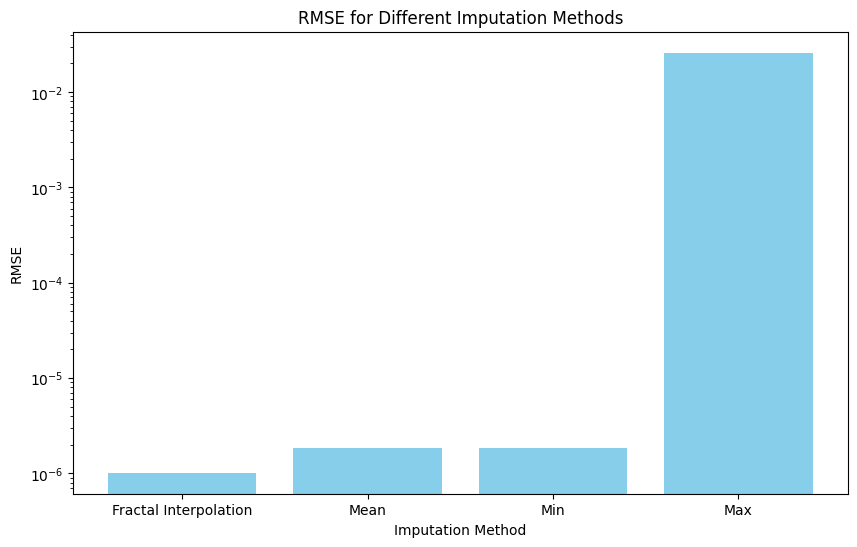

In [47]:
import matplotlib.pyplot as plt

# RMSE values for each method
methods = ['Fractal Interpolation', 'Mean', 'Min', 'Max']
rmse_values = [1.014e-06, 1.851e-06, 1.853e-06, 2.591e-02]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(methods, rmse_values, color='skyblue')
plt.title('RMSE for Different Imputation Methods')
plt.xlabel('Imputation Method')
plt.ylabel('RMSE')
plt.yscale('log')  # Log scale to better visualize differences
plt.show()

In [20]:
print(df_fractal_interpolated["xs"].min(), df_fractal_interpolated["xs"].max())

2.3584850606908014e-13 0.0848235294117647


In [21]:
print(df_fractal_interpolated["xl"].min(), df_fractal_interpolated["xl"].max())

5.20833333334712e-13 0.103


In [18]:
def create_folder(year: int):
    #create folder to hold the data
    os.makedirs(f"{OUT_DIR}/{year}", exist_ok = True)

## Apply fractal interpolation

In [3]:
df_missing_info = df_data.copy()
df_missing_info

,file_names,satellite,year,month,total_rows,missing_values
0,1986/g05_xrs_1m_19860101_19860131.csv,goes05,1986,1,44640,617
1,1986/g05_xrs_1m_19860201_19860228.csv,goes05,1986,2,40320,203
2,1986/g05_xrs_1m_19860301_19860331.csv,goes05,1986,3,44640,2686
3,1986/g05_xrs_1m_19860401_19860430.csv,goes05,1986,4,43200,3646
4,1986/g05_xrs_1m_19860501_19860531.csv,goes05,1986,5,44640,517
...,...,...,...,...,...,...
451,2023/2023-08.csv,goes16,2023,8,44640,0
452,2023/2023-09.csv,goes16,2023,9,43200,0
453,2023/2023-10.csv,goes16,2023,10,44640,0
454,2023/2023-11.csv,goes16,2023,11,43200,0


## Fractal interpolation applied

In [22]:
import numpy as np
import scipy, random 
import matplotlib.pyplot as plt
def d( x ):
    # expects an enumerable, subtracts the right endpoint from the left
    return float(x[-1]-x[0])


def an( x, i ):
    # the (0,0) element in the rotation matrix of the iterated function system (IFS)
    return ( x[i] - x[i-1] )/d(x)


def dn( x, i ):
    # the (0) element in the translation vector of the IFS
    return ( x[-1]*x[i-1] - x[0]*x[i] )/d(x)


def cn( x, y, i, sn ):
    # the (1,0) element in the rotation matrix of the IFS
    return ( y[i] - y[i-1] )/d(x) - sn*( y[-1] - y[0] )/d(x)


def en( x, y, i, sn ):
    # the (1) element in the translation vector of the IFS
    return ( x[-1]*y[i-1] - x[0]*y[i])/d(x) - sn*( x[-1]*y[0] - x[0]*y[-1] )/d(x)

def Wn( X, U, i, sn ):
    '''
    the iterated function system
      R is the rotation matrix
      T is the translation vector
    computes
      R*X + T
    '''
    # rotation matrix
    R = np.matrix([[ an(U[:,0],i), 0 ],\
                   [ cn(U[:,0],U[:,1],i,sn), sn ]])
    # transalation vector
    T = np.matrix([[ dn(U[:,0],i) ],\
                   [ en(U[:,0],U[:,1],i,sn) ]])
    # calculate R*X + T
    tmp = R * np.matrix(X).T + T
    # return the new points
    xp, yp = np.array( tmp.T )[0]
    return xp, yp
    
def FIF( U, nth, sn, balance=False ):
    # the fractal interpolating function
    X = U.copy()
    x, y = list( X[:,0] ), list( X[:,1] )
    M = U.shape[0]

    for i in range(nth):
        # call an IFS for each segment
        for j in range( 1,M ):
            xp, yp = Wn( X[i], U, j, sn )
            x.append( xp )
            y.append( yp )
            if balance:
                xp, yp = Wn( X[i], U, j, -sn )
                x.append( xp )
                y.append( yp )
    x = np.array(x)
    y = np.array(y)
    # this puts the interpolated
    # data points at the bottom of X
    X = np.vstack((x,y)).T
    X = X[ X[:,0].argsort() ]
    # these two lines rearrage X so that the interpolated
    # data points are between the original data points
    null, indices = np.unique( X[:,0], return_index=True )
    X = X[ indices ]
    return X


In [23]:
def select_nth_values_and_build_df(df_with_missing, nth = 10):
    df_with_missing["xs_copy"] = df_with_missing["xs"]
    df_with_missing["xl_copy"] = df_with_missing["xl"]

    # Get the last row of the DataFrame
    last_row = df_with_missing.iloc[-1]

    # Create a new index for the new row
    new_index = len(df_with_missing)

    # Add the new row to the DataFrame with a different index
    # this extra row helps to keep the same length after the interpolation
    df_with_missing.loc[new_index] = last_row

    # bfill and ffill all the missing rows.
    # the idea here is to interpolate data on all the filled values and 
    # then take only the missing values in the final df
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(-99999, method='bfill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(-99999, method='bfill')
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(-99999, method='ffill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(-99999, method='ffill')

    ## there is also some data that are corrupted and contains values 32700
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(32700, method='bfill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(32700, method='bfill')
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(32700, method='ffill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(32700, method='ffill')

    df_nth_taken = df_with_missing[::nth].reset_index(drop = True)
    return df_nth_taken

In [24]:
def apply_interpolation_and_get_data(df_nth_taken, df_with_missing, nth):
    xs = df_nth_taken["xs_copy"].tolist()
    xl = df_nth_taken["xl_copy"].tolist()
    indexs = df_nth_taken.index.tolist()

    np_xs = np.array(xs)
    np_xl = np.array(xl)
    np_indexs = np.array(indexs)

    stacked_xs = np.vstack((np_indexs, np_xs)).T
    stacked_xl = np.vstack((np_indexs, np_xl)).T

    ## 0.01 is our vertical scaling factor. You can control it to get new interpolated data
    interpolated_xs = FIF(stacked_xs, nth, 0.01)
    interpolated_xl = FIF(stacked_xl, nth, 0.01)

    df_with_missing["xs_interpolated"] = interpolated_xs[:, 1]
    df_with_missing["xl_interpolated"] = interpolated_xl[:, 1]

    ## filtering out the rows based on the logic like:
    ## if the original value is presented them we are taking them
    ## if it is not presented them we will take newly interpolated values.
    df_with_missing['xs'] = df_with_missing.apply(lambda row: row['xs_interpolated'] if row['xs'] == -99999 else row['xs'], axis=1)
    df_with_missing['xl'] = df_with_missing.apply(lambda row: row['xl_interpolated'] if row['xl'] == -99999 else row['xs'], axis=1)

    df_interpolated = df_with_missing[["time_tag", "xs", "xl"]]
    
    return df_interpolated

In [ ]:
file_names = df_missing_info["file_names"].tolist()
for i, file_name in enumerate(file_names):
    #if os.path.exists(os.path.join(OUT_DIR, file_name)): continue
    year = file_name.split("/")[0]
    create_folder(year)
    print("path:", os.path.join(IN_DIR, file_name))
    df_with_missing = pd.read_csv(os.path.join(IN_DIR, file_name))

    ## Here the idea is to take each tenth values of the given file
    ## and then interpolate the in between data and after that filtered them
    df_nth_taken = select_nth_values_and_build_df(df_with_missing, nth = 10)
    
    df_interpolated = apply_interpolation_and_get_data(df_nth_taken, df_with_missing, nth = 10)
    
    ## dropping it as we have added it extra in our process
    df_interpolated = df_interpolated.drop(df_interpolated.index[-1])
    
    ## some values are having - in them, using absolute value for that
    df_interpolated['xs'] = df_interpolated['xs'].abs()
    df_interpolated['xl'] = df_interpolated['xl'].abs()

    df_interpolated.to_csv(os.path.join(OUT_DIR, file_name), index = False)

## Apply scaling factor for satellites 1 to 15 using   
- XS/XRSA divide by 0.85 
- XL/XRSB divide by 0.7  

In [ ]:
for i, row in df_data.iterrows():
    if row["satellite"] != "goes16":
        df = pd.read_csv(os.path.join(OUT_DIR, row["file_names"]))
        ## Apply scaling factor/error correction factor to data
        # Divide the 'xs' column by 0.85
        df['xs'] = df['xs'] / 0.85

        # Divide the 'xl' column by 0.7
        df['xl'] = df['xl'] / 0.7
        df.to_csv(os.path.join(OUT_DIR, row["file_names"]), index= False)
        print(row["file_names"], " done!")

    

## Simple data quality checks

In [ ]:
for i, row in df_data.iterrows():
    df = pd.read_csv(os.path.join(OUT_DIR, row["file_names"]))
    count_zeros = len(df[(df['xs'] == 0) | (df['xl'] == 0)])

    # Print the count for each DataFrame
    print(f"DataFrame {row['file_names']} has {count_zeros} rows with zeros in 'xs' or 'xl'.")

    # Replace 0 with NaN to use ffill and bfill
    df[['xs', 'xl']] = df[['xs', 'xl']].replace(0, pd.NA)

    # Forward fill (ffill) and backward fill (bfill)
    df[['xs', 'xl']] = df[['xs', 'xl']].ffill().bfill()
    
    count_zeros = len(df[(df['xs'] == 0) | (df['xl'] == 0)])

    # Print the count for each DataFrame
    print(f"DataFrame {row['file_names']} has {count_zeros} rows with zeros in 'xs' or 'xl'.")
    df.to_csv(os.path.join(OUT_DIR, row["file_names"]), index= False)
    print("----------------")

In [ ]:
##  checking if there is any more missing values in our data
xs_max = []
xs_min = []

xl_max = []
xl_min = []

time_frames = []
for i, row in df_data.iterrows():
    df = pd.read_csv(os.path.join(OUT_DIR, row["file_names"]))
    s = (df['xl'] > 1).sum()
    xs_max.append(df['xs'].max())
    xs_min.append(df['xs'].min())

    xl_max.append(df['xl'].max())
    xl_min.append(df['xl'].min())

    time_frames.append(f"{row['year']}-{row['month']}")    
    print(row["file_names"], "|",s, "|",df['xl'].max(), "|" ,df['xs'].max(),"|", df['xl'].min(),"|", df['xs'].min())

## EDA of features patterns

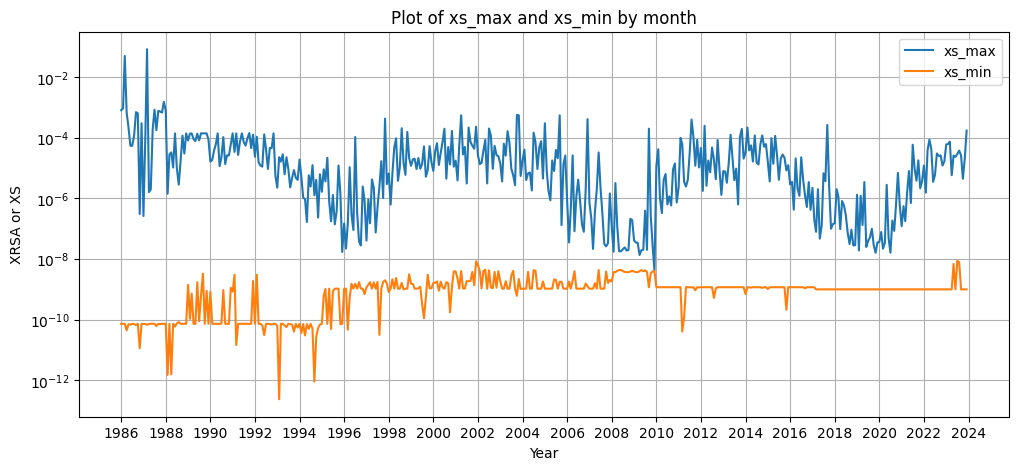

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Convert date strings to datetime objects
time_frame = [datetime.strptime(date, '%Y-%m') for date in time_frames]

# Create the plot
plt.figure(figsize=(12, 5))  # You can adjust the figure size as needed
plt.semilogy(time_frame, xs_max, label="xs_max")
plt.semilogy(time_frame, xs_min, label="xs_min")

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Plot of xs_max and xs_min by month')
plt.xlabel('Year')
plt.ylabel('XRSA or XS')
plt.grid(True)

plt.legend()

plt.show()


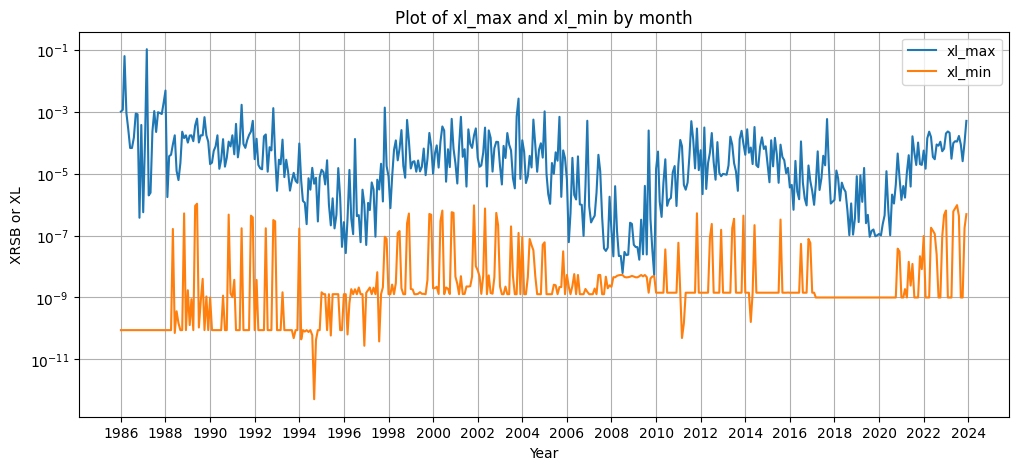

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Convert date strings to datetime objects
time_frame = [datetime.strptime(date, '%Y-%m') for date in time_frames]

# Create the plot
plt.figure(figsize=(12, 5))  # You can adjust the figure size as needed
plt.semilogy(time_frame, xl_max, label="xl_max")
plt.semilogy(time_frame, xl_min, label="xl_min")

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Plot of xl_max and xl_min by month')
plt.xlabel('Year')
plt.ylabel('XRSB or XL')
plt.grid(True)

plt.legend()

plt.show()


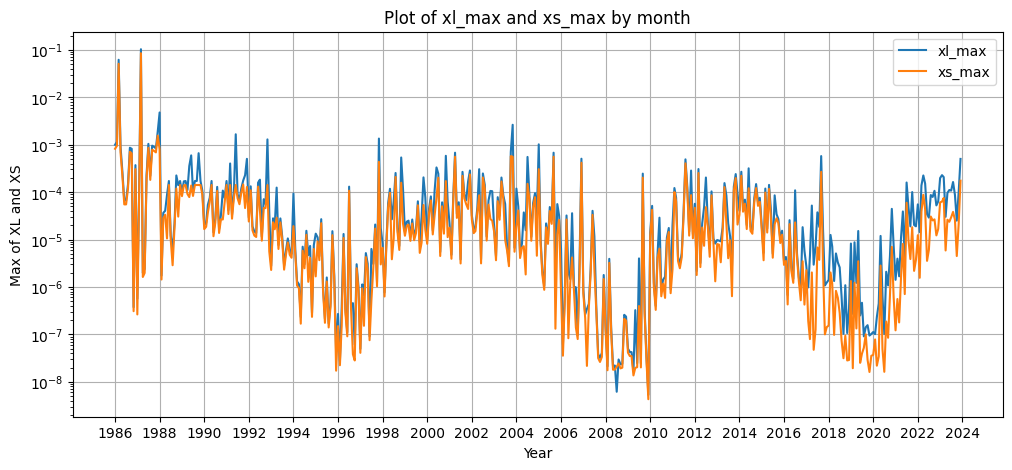

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Convert date strings to datetime objects
time_frame = [datetime.strptime(date, '%Y-%m') for date in time_frames]

# Create the plot
plt.figure(figsize=(12, 5))  # You can adjust the figure size as needed
plt.semilogy(time_frame, xl_max, label="xl_max")
plt.semilogy(time_frame, xs_max, label="xs_max")

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Plot of xl_max and xs_max by month')
plt.xlabel('Year')
plt.ylabel('Max of XL and XS')
plt.grid(True)

plt.legend()

plt.show()


In [32]:
## merge all dataframe to get a continuous data file
dataframes = []
for i, row in df_data.iterrows():
    df = pd.read_csv(os.path.join(OUT_DIR, row["file_names"]))
    dataframes.append(df)

# Concatenate the list of DataFrames into one DataFrame
concatenated_df = pd.concat(dataframes, ignore_index=True)


In [33]:
concatenated_df

,time_tag,xs,xl,Time_tag
0,1986-01-01 00:00:00.000,7.282353e-11,8.842857e-11,NaN
1,1986-01-01 00:01:00.000,7.282353e-11,8.842857e-11,NaN
2,1986-01-01 00:02:00.000,7.282353e-11,8.842857e-11,NaN
3,1986-01-01 00:03:00.000,7.282353e-11,8.842857e-11,NaN
4,1986-01-01 00:04:00.000,7.282353e-11,8.842857e-11,NaN
...,...,...,...,...
19982875,NaN,3.666610e-07,6.414194e-06,2023-12-31 23:55:00
19982876,NaN,3.539363e-07,6.254857e-06,2023-12-31 23:56:00
19982877,NaN,3.453191e-07,6.114120e-06,2023-12-31 23:57:00
19982878,NaN,3.319112e-07,5.965794e-06,2023-12-31 23:58:00


## Merge all the data to form a dataset

In [34]:
concatenated_df['time_tag'] = concatenated_df['time_tag'].fillna(concatenated_df['Time_tag'])
concatenated_df.drop('Time_tag', axis=1, inplace=True)
concatenated_df.to_csv("sol_22_23_24_data_no_missing_scaling_applied_v4.0.csv", index = False)

In [27]:
concatenated_df

,time_tag,xs,xl
0,1986-01-01 00:00:00.000,7.282353e-11,8.842857e-11
1,1986-01-01 00:01:00.000,7.282353e-11,8.842857e-11
2,1986-01-01 00:02:00.000,7.282353e-11,8.842857e-11
3,1986-01-01 00:03:00.000,7.282353e-11,8.842857e-11
4,1986-01-01 00:04:00.000,7.282353e-11,8.842857e-11
...,...,...,...
19896475,2023-12-31 23:55:00,3.666610e-07,6.414194e-06
19896476,2023-12-31 23:56:00,3.539363e-07,6.254857e-06
19896477,2023-12-31 23:57:00,3.453191e-07,6.114120e-06
19896478,2023-12-31 23:58:00,3.319112e-07,5.965794e-06


In [28]:
concatenated_df.describe()

,xs,xl
count,1.989648e+07,1.989648e+07
mean,9.720181e-08,5.196129e-07
std,2.938262e-05,3.712336e-05
min,2.358485e-13,5.208333e-13
25%,1.411765e-09,2.485714e-09
50%,5.412767e-09,1.025714e-08
75%,1.517647e-08,8.882596e-08
max,8.482353e-02,1.030000e-01


In [29]:
## As there is a buf in the data that is why it is showing the max value 32700
max_value = concatenated_df['xs'].max()
min_value = concatenated_df['xs'].min()

print(f"Max value of column xs: {max_value}")
print(f"Min value of column xs: {min_value}")

Max value of column xs: 0.0848235294117647
Min value of column xs: 2.3584850606908014e-13


In [30]:
max_value = concatenated_df['xl'].max()
min_value = concatenated_df['xl'].min()

print(f"Max value of column xs: {max_value}")
print(f"Min value of column xs: {min_value}")

Max value of column xs: 0.103
Min value of column xs: 5.20833333334712e-13
